<left>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/images/IBM_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Python Exercise for Introductory Data Analysis

Estimated time needed: 60 minutes


This lab is designed to allow for running basic Python commands for Introductory Data Analysis. It covers some sample data uploads, pre-processing, analyzing and visualization. Python provides a very rich environment to conduct deeper analyses and build sophisticated statistical models. For learning such advanced techniques, the student is encouraged to register for ML and Datascience courses available through IBM's certification courses


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Setup">Setup</a></li>
    <li><a href="#Data">Data</a></li>  
    <li><a href="#Exercises">Exercises</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

Use Python to solve load data, pre-process it, analyze and visualize it.


## Setup

Operations in Python require certain libraries to be loaded, depending on the function that one is trying to use. There are several libraries available for use. Some Python enviroments come with pre-loaded libraries. However, in this exercise, we will see how to load such libraries


## Data 

### US Housing Market Factors

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/images/housing-cover.jpg" width="30%" alt="housing image">

US housing market depends on various factors. Here are some macroeconomic factors relevant to the market. The following attributes have been collected,

 - `Date`: Year 

 - `House_Price_Index`: House price change according to the index base period set (you can check the date at which this value is 100). 

 - `Stock_Price_Index`: Stock price change according to the index base period set (you can check the date at which this value is 100). 

 - `Consumer_Price_Index`: The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. 

 - `Population`: Population of USA (unit: thousands). 

 - `Unemployment_Rate`: Unemployment rate of USA (unit: percentage). 

 - `Real_GDP`: GDP with adjusted inflation (Annual version unit: billions of chain 2012 dollars in, Monthly version unit: Annualised change). 

 - `Mortgage_Rate`: Interest charged on mortgages (unit: percentage). 

 - `Real_Disposable_Income` (Real Disposable Personal Income): Money left from salary after all the taxes are paid (unit: billions of chain 2012 dollars). 
 
Your task is to load the data, pre-process it, explore and visualize it


# Install Libraries


In [17]:
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

# Exercises


### Exercise 1: Import numpy, pandas and matplotlib libraries into Jupyter 


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 2: Create a dataframe from a csv file and display the size of the dataframe 


In [19]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [20]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/data/Annual_Macroeconomic_Factors.csv'
await download(path, "Annual_Macroeconomic_Factors.csv")
path="Annual_Macroeconomic_Factors.csv"

In [21]:
data = pd.read_csv('Annual_Macroeconomic_Factors.csv')
data.size

423

### Exercise 3: Create a reduced dataframe by dropping Stock_Price_Index


In [22]:
data_reduced = data.drop(["Stock_Price_Index"], axis=1)
data_reduced.head()

,Date,House_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,88.06755,1.10358,5.83333,6780.924,11.20365,21672


### Exercise 4: Create a smaller dataframe by dropping data that has Unemployment_Rate > 9.5% 


In [23]:
data_reduced_subset = data.drop(data[data["Unemployment_Rate"] > 9.5].index)
data_reduced_subset.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672


### Exercise 5: Get the dimensions of the dataframe created in Question 4 


In [24]:
data_reduced_subset.size

396

### Exercise 6: Create a dataframe by selecting Real_Disposable_Income and House_Price_Index attributes from the original dataset and print out the statistics for these attributes 


In [25]:
disp_income=data[['Real_Disposable_Income', 'House_Price_Index']]
disp_income.describe()

,Real_Disposable_Income,House_Price_Index
count,47.000000,47.000000
mean,32040.936170,240.145585
std,8006.301392,120.405988
min,19908.000000,61.090000
25%,25432.500000,140.788750
50%,31712.000000,211.462500
75%,38235.000000,339.353750
max,48219.000000,523.260000


### Exercise 7: Plot a scatter plot between House_Price_Index and Real_Disposable_Income 


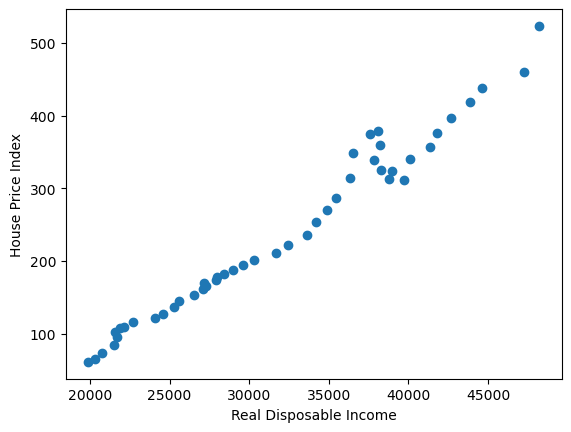

In [34]:
x=data['Real_Disposable_Income']
y=data['House_Price_Index']
plt.scatter(x,y)
plt.xlabel("Real Disposable Income")
plt.ylabel("House Price Index")
plt.show()

### Exercise 8: Create a bar chart with date (as year) on X-axis and Real_GDP on the Y-axis 


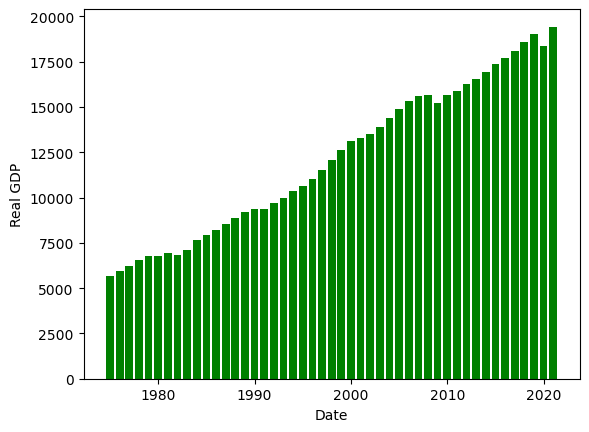

In [33]:
x=pd.DatetimeIndex(data['Date']).year
y=data['Real_GDP']
plt.bar(x,y,color ='green')
plt.xlabel("Date")
plt.ylabel("Real GDP")
plt.show()

### Exercise 9: Create a combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis 


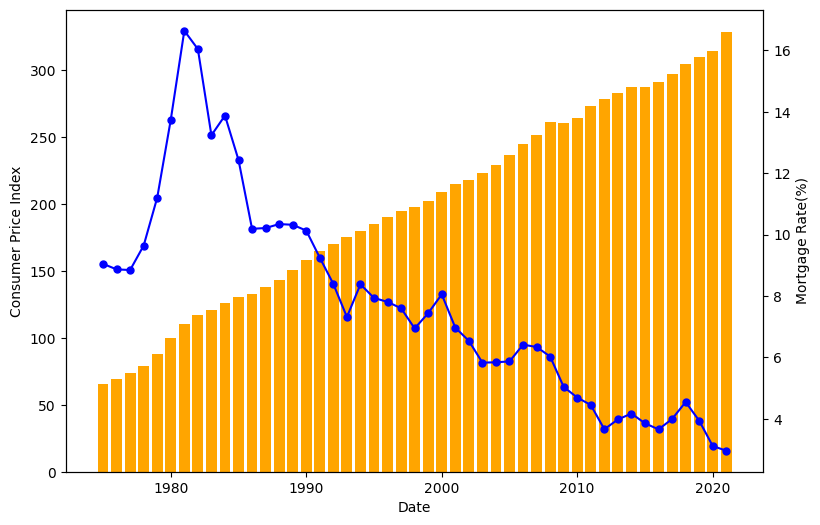

In [32]:
fig, ax1 = plt.subplots(figsize=(9, 6))
x=pd.DatetimeIndex(data['Date']).year
y1=data['Consumer_Price_Index']
y2=data['Mortgage_Rate']

ax2 = ax1.twinx()  
ax1.bar(x,y1, color="orange")
ax2.plot(x,y2, color="blue", marker=".", markersize=10)
ax1.set_xlabel("Date")
ax1.set_ylabel("Consumer Price Index")
ax2.set_ylabel("Mortgage Rate(%)")
plt.show()

### Exercise 10: Create sub-plots with Date on X-axis and Stock_Price_Index on subplot 1 and Consumer_Price_Index on subplot 2


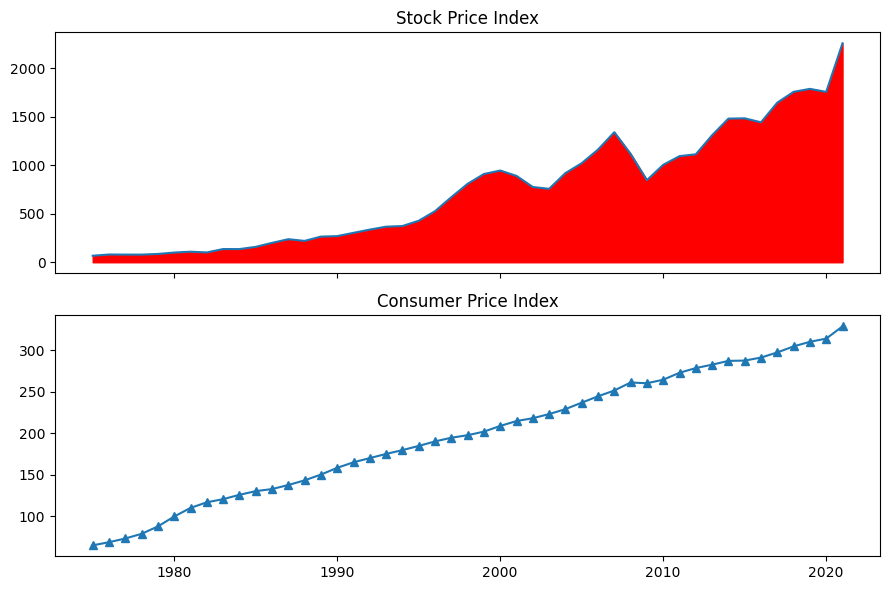

In [31]:
x0=pd.DatetimeIndex(data['Date']).year
x1=data['Stock_Price_Index']
x2=data['Consumer_Price_Index']

plt.subplots(2, 1, sharex=True, figsize=(9, 6))

plt.subplot(2,1,1)
plt.plot(x0,x1)
plt.fill_between(x0,x1,color="red")
plt.title("Stock Price Index")

plt.subplot(2,1,2)
plt.plot(x0,x2,marker="^")
plt.title("Consumer Price Index")

plt.tight_layout()
plt.show()

```## Change Log| Date (YYYY-MM-DD) | Version | Changed By | Change Description| ----------------- | ------- | ---------- | ---------------------------------------------------------- || 2022-01-24        | 1.2     | Lakshmi     | Added logo and piplite updates |
```

## <h3 align="left"> © Copyright IBM Corporation. All rights reserved. <h3/>
